
## Setup

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv
/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Regression example

## EDA

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There seems to be no NA

In [6]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

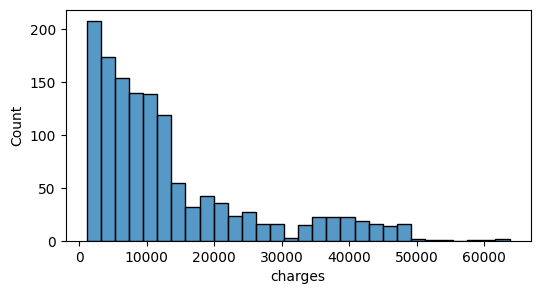

In [7]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.histplot(df['charges']);

`charges` distribution seems to be right skewed. We can moderate this by log transforming the data.

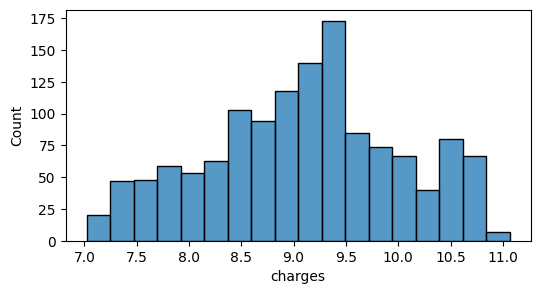

In [8]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.histplot(np.log1p(df['charges']));

The distribution seems less skewed, we can use this as the response variable.

In [9]:
df['charges'] = np.log1p(df['charges'])  # we can convert this back to original by np.expm1

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098828
std,14.049960,6.098187,1.205493,0.919379
min,18.000000,15.960000,0.000000,7.023647
25%,27.000000,26.296250,0.000000,8.464064
50%,39.000000,30.400000,1.000000,9.146658
75%,51.000000,34.693750,2.000000,9.719618
max,64.000000,53.130000,5.000000,11.063061


In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Let's make a child_yesno variable where 1 indicates the person has children

In [15]:
df['child_yesno'] = df['children']
df.loc[df['child_yesno'] > 0, 'child_yesno'] = 1

In [16]:
df['child_yesno'].value_counts()

child_yesno
1    764
0    574
Name: count, dtype: int64

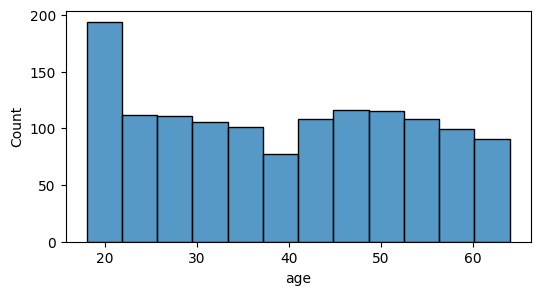

In [17]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.histplot(df['age']);

In [18]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

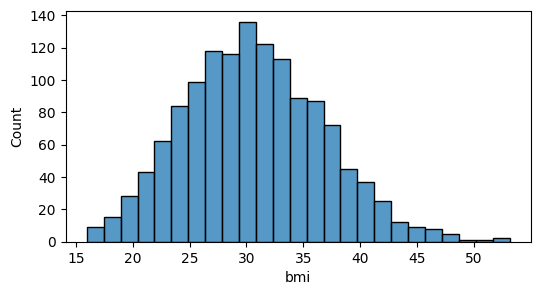

In [19]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.histplot(df['bmi']);

bmi above 30 is considered obese. Let's make obese dummy variable

In [20]:
df['obese'] = 'no'
df.loc[df['bmi'] > 30, 'obese'] = 'yes'

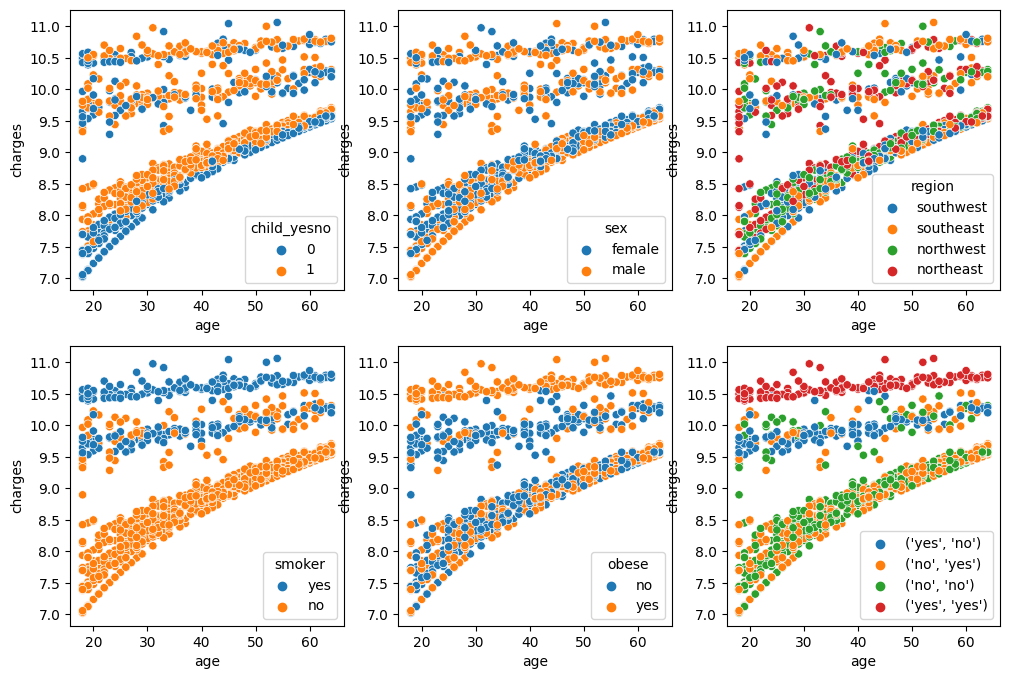

In [21]:
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'child_yesno', ax = ax[0][0]);
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex', ax = ax[0][1]);
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'region', ax = ax[0][2]);
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker', ax = ax[1][0]);
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'obese', ax = ax[1][1]);
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = df[['smoker', 'obese']].apply(tuple, axis = 1), ax = ax[1][2]);

There seems to be a positive linear relationship between age and charges. We can see that `age` and `charges` show 3 noticable lines. `smoker` seems to be the variable that determines the second line and `obese` seems to be the variable that determines the third line. Other categorical variable doesn't seem to show clear patterns.

In conclusion, age and charge shows a positive linear relationship and the intercept changes whether the person is a smoker or obese. The group with the largest charges are those who are smokers and obese.

In [22]:
df

,age,sex,bmi,children,smoker,region,charges,child_yesno,obese
0,19,female,27.900,0,yes,southwest,9.734236,0,no
1,18,male,33.770,1,no,southeast,7.453882,1,yes
2,28,male,33.000,3,no,southeast,8.400763,1,yes
3,33,male,22.705,0,no,northwest,9.998137,0,no
4,32,male,28.880,0,no,northwest,8.260455,0,no
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755,1,yes
1334,18,female,31.920,0,no,northeast,7.699381,0,yes
1335,18,female,36.850,0,no,southeast,7.396847,0,yes
1336,21,female,25.800,0,no,southwest,7.605365,0,no


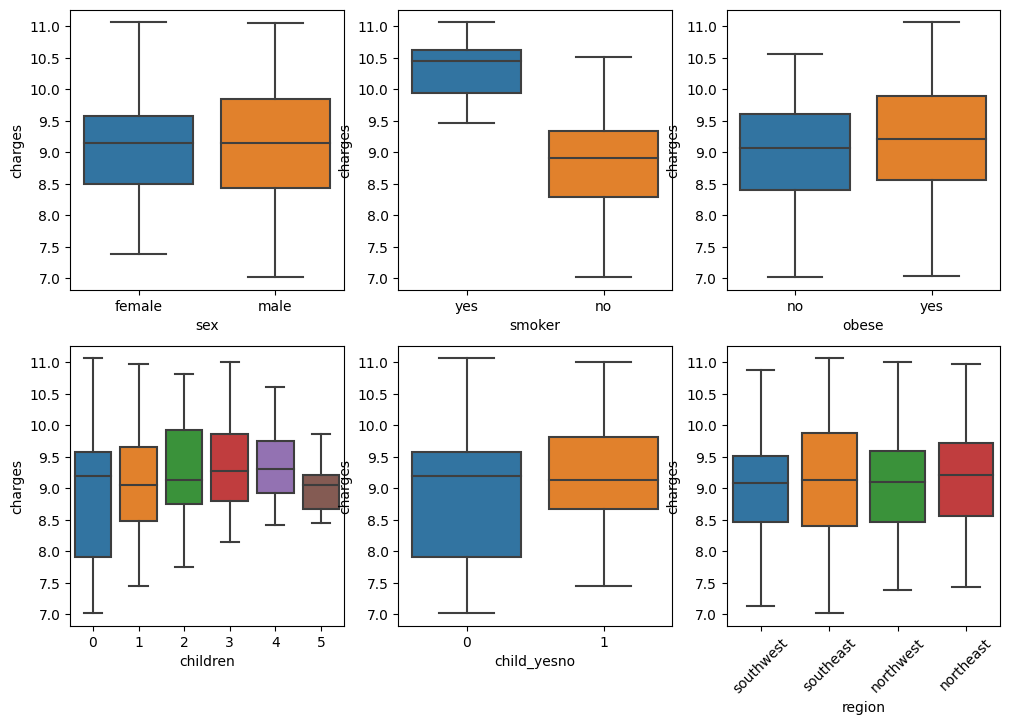

In [23]:
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
sns.boxplot(data = df, x = 'sex', y = 'charges', ax = ax[0][0]);
sns.boxplot(data = df, x = 'smoker', y = 'charges', ax = ax[0][1]);
sns.boxplot(data = df, x = 'obese', y = 'charges', ax = ax[0][2]);
sns.boxplot(data = df, x = 'children', y = 'charges', ax = ax[1][0]);
sns.boxplot(data = df, x = 'child_yesno', y = 'charges', ax = ax[1][1]);
sns.boxplot(data = df, x = 'region', y = 'charges', ax = ax[1][2]).tick_params(axis='x', labelrotation=45);

We can see that each categorical variable clearly show a pattern with `charges`

## Data preprocessing for training

In [24]:
# childe_yesno and obese were for visualization purposes, so we are going to remove them for training
df = df.drop(['child_yesno', 'obese'], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755
1334,18,female,31.920,0,no,northeast,7.699381
1335,18,female,36.850,0,no,southeast,7.396847
1336,21,female,25.800,0,no,southwest,7.605365


In [25]:
# Preprocessing for categorical variables

from sklearn.preprocessing import OneHotEncoder

df['sex'] = df['sex'].replace({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

encoder = OneHotEncoder(sparse_output = False)
onehot_df = pd.DataFrame(encoder.fit_transform(df[['region']]))
onehot_df.columns = encoder.get_feature_names_out()

df = pd.concat([df.drop('region', axis = 1), onehot_df], axis = 1)

In [26]:
# Feature engineering for numerical variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

In [27]:
# Train test split

from sklearn.model_selection import train_test_split

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 5)

## Baseline

In [28]:
import sklearn
import xgboost

In [29]:
# baseline for XGBoost

xgb = xgboost.XGBRegressor(random_state = 5)

evaluation = [(X_train, y_train), (X_val, y_val)]

xgb = xgb.fit(X_train, y_train,
             eval_set = evaluation,
             early_stopping_rounds = 10)

y_base = xgb.predict(X_test)

print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_base)))
print(np.sqrt(sklearn.metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_base))))

[0]	validation_0-rmse:0.68930	validation_1-rmse:0.68949
[1]	validation_0-rmse:0.53905	validation_1-rmse:0.56446
[2]	validation_0-rmse:0.44247	validation_1-rmse:0.49150
[3]	validation_0-rmse:0.38235	validation_1-rmse:0.44932
[4]	validation_0-rmse:0.34055	validation_1-rmse:0.42921
[5]	validation_0-rmse:0.31130	validation_1-rmse:0.41272
[6]	validation_0-rmse:0.28601	validation_1-rmse:0.40863
[7]	validation_0-rmse:0.27082	validation_1-rmse:0.40769
[8]	validation_0-rmse:0.25546	validation_1-rmse:0.40817
[9]	validation_0-rmse:0.24576	validation_1-rmse:0.40913
[10]	validation_0-rmse:0.23629	validation_1-rmse:0.40954
[11]	validation_0-rmse:0.23391	validation_1-rmse:0.40984
[12]	validation_0-rmse:0.22500	validation_1-rmse:0.41360
[13]	validation_0-rmse:0.22156	validation_1-rmse:0.41373
[14]	validation_0-rmse:0.21343	validation_1-rmse:0.41274
[15]	validation_0-rmse:0.20481	validation_1-rmse:0.41320
[16]	validation_0-rmse:0.19776	validation_1-rmse:0.41312
0.3550548261594189
4486.041200138998


## Bayesian optimization with _**hyperopt**_


**_hyperopt_** can be used for [Bayesian optimization](https://en.wikipedia.org/wiki/Bayesian_optimization#:~:text=Bayesian%20optimization%20is%20a%20sequential,expensive%2Dto%2Devaluate%20functions.) to search through a hyperparameter space and finds the best possible values that yield the minimum of the loss function.


The optimization process consists of 4 parts:



**1. Define search space**

> The search space is the input values over which we want to search.  

> **The search space acts as the _prior distributions_ of the hyperparameter values.**



**2. Define objective function**

> The objective function can be any function which returns a real value that we want to minimize. In this case, **we want to minimize the validation error** of a machine learning model with respect to the hyperparameters. **If the real value is accuracy, then we want to maximize it. Then the function should return the negative of that metric**.



**3. Optimization algorithm**

> It is the method used to construct the surrogate objective function and choose the next values to evaluate.



**4. Results**

> Results are score or value pairs that the algorithm uses to build the model.


### Defining search spaces


**_hyperopt_** uses stochastic expressions to explore the search spaces. The following are a few examples.



- **hp.choice(label, options)** — Returns one of the options, which should be a list or tuple.

- **hp.randint(label, upper)** — Returns a random integer between the range [0, upper).

- **hp.uniform(label, low, high)** — Returns a value uniformly between low and high.

- **hp.quniform(label, low, high, q)** — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and **returns an integer**. We generally set q = 1.

- **hp.normal(label, mu, sigma)** — Returns a real value that’s normally-distributed with mean and standard deviation.

In [30]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [31]:
space = {'eta': hp.uniform('eta', 0.01, 0.3), 
         'max_depth': hp.quniform('max_depth', 3, 10, 1), 
         'subsample': hp.uniform('subsample', 0.5, 1),
         'n_estimators': hp.quniform('n_estimators', 100, 300, 1)
        }

In [32]:
def objective(space):
    model = xgboost.XGBRegressor(
        eta = space['eta'],
        max_depth = int(space['max_depth']),
        subsample = space['subsample'],
        n_estimators = int(space['n_estimators']),
        random_state = 5
    )
    
    evaluation = [(X_train, y_train), (X_val, y_val)]
    
    model.fit(X_train, y_train,
             eval_set = evaluation,
             early_stopping_rounds = 10,
             verbose = False)
    
    pred = model.predict(X_val)
    
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_val, pred))
    
    return {'loss': rmse, 'status': STATUS_OK}

In [33]:
trials = Trials()

best_params = fmin(fn = objective,
                  space = space,
                  algo = tpe.suggest,
                  max_evals = 100,
                  trials = trials)

100%|██████████| 100/100 [00:09<00:00, 10.94trial/s, best loss: 0.3844354516013586]


In [34]:
best_params

{'eta': 0.24548043479818746,
 'max_depth': 3.0,
 'n_estimators': 253.0,
 'subsample': 0.9457665716267157}

In [35]:
model = xgboost.XGBRegressor(eta = best_params['eta'],
                            max_depth = int(best_params['max_depth']),
                            subsample = best_params['subsample'],
                            n_estimators = int(best_params['n_estimators']),
                            random_state = 5)

model = model.fit(X_train, y_train)
y_hyperopt = model.predict(X_test)

print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_hyperopt)))
print(np.sqrt(sklearn.metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_hyperopt))))

0.38596122143241585
4904.151073792858


## RandomizedSearchCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

space = {'eta': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.6, 0.8, 0.9],
        'n_estimators': [100, 150, 200, 300]}

xgb = xgboost.XGBRegressor(random_state = 5)
cv = RandomizedSearchCV(xgb, space, n_iter = 20, random_state = 5, verbose = True)
cv = cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
cv.best_params_

{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 10, 'eta': 0.01}

In [38]:
xgb_cv = xgboost.XGBRegressor(eta = 0.01,
                              max_depth = 10,
                              subsample = 0.5,
                              n_estimators = 300,
                              random_state = 5)
xgb_cv = xgb_cv.fit(X_train, y_train,
                    eval_set = evaluation,
                    early_stopping_rounds = 10,
                    verbose = False)

y_xgb_cv = xgb_cv.predict(X_test)

print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_xgb_cv)))
print(np.sqrt(sklearn.metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_xgb_cv))))

0.3510076192669613
4355.639093165931


## XAI SHAP values

SHAP values quantifies the amount a predictor changed the prediction value and its direction.

In [39]:
import shap

In [40]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

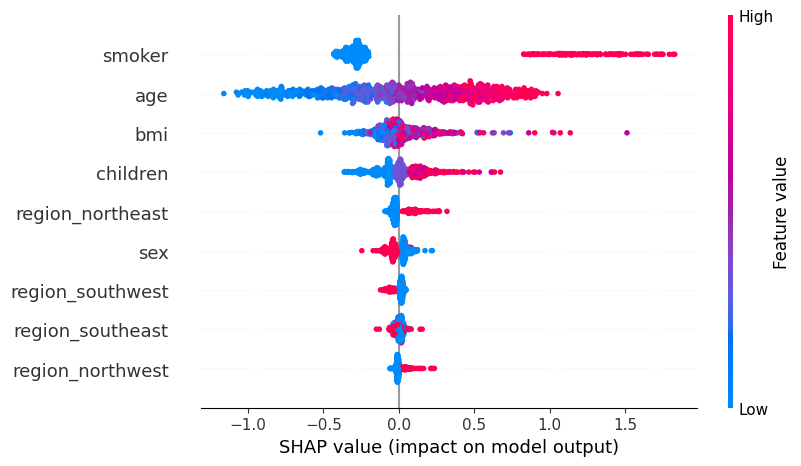

In [41]:
shap.plots.beeswarm(shap_values)

We can see that `smoker` and `age` are the two largest contributors to the predicted value. Smokers represented by `smoker = 1` significantly increased the predicted value while nonsmokers, `smoker = 0` decreased the predicted value. `age` also positive linear relationship with predicted value where higher age increased the value and vice versa.

# Classification example

In [42]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv')
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [44]:
from sklearn.preprocessing import OneHotEncoder

df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

encoder = OneHotEncoder(sparse_output = False)
onehot_df = pd.DataFrame(encoder.fit_transform(df[['Geography']]))
onehot_df.columns = encoder.get_feature_names_out()
df = pd.concat([df.drop('Geography', axis = 1), onehot_df], axis = 1)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

## Baseline

In [47]:
import xgboost

In [48]:
evaluation = [(X_train, y_train), (X_val, y_val)]

xgb = xgboost.XGBClassifier(random_state = 5)
xgb = xgb.fit(X_train, y_train,
              eval_set = evaluation,
              early_stopping_rounds = 10,
              verbose = False)

y_xgb = xgb.predict(X_test)

print(sklearn.metrics.accuracy_score(y_test, y_xgb))

0.857


In [49]:
pd.crosstab(y_test, y_xgb)

col_0,0,1
Exited,,
0,1528,67
1,219,186


## hyperopt

In [50]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [51]:
space = {'eta': hp.uniform('eta', 0.01, 0.3),
         'max_depth': hp.quniform('max_depth', 3, 10, 1),
         'subsamples': hp.uniform('subsamples', 0.5, 1),
         'n_estimators': hp.quniform('n_estimators', 100, 300, 1)}

In [52]:
def objective(space):
    model = xgboost.XGBClassifier(
        eta = space['eta'],
        max_depth = int(space['max_depth']),
        subsamples = space['subsamples'],
        n_estimators = int(space['n_estimators']),
        random_state = 5
    )
    
    model.fit(X_train, y_train,
             eval_set = evaluation,
             early_stopping_rounds = 10,
             verbose = False)
    
    pred = model.predict(X_val)
    
    return {'loss': sklearn.metrics.accuracy_score(y_val, pred), 'status': STATUS_OK}

In [53]:
trials = Trials()

best_params = fmin(fn = objective,
                  space = space,
                  algo = tpe.suggest,
                  max_evals = 100,
                  trials = trials)

100%|██████████| 100/100 [00:25<00:00,  3.96trial/s, best loss: 0.859375]


In [54]:
xgb_hyperopt = xgboost.XGBClassifier(
    eta = best_params['eta'],
    max_depth = int(best_params['max_depth']),
    subsamples = best_params['subsamples'],
    n_estimators = int(best_params['n_estimators']),
    random_state = 5
)

xgb_opt = xgb_hyperopt.fit(X_train, y_train,
                               eval_set = evaluation,
                               early_stopping_rounds = 10,
                               verbose = False)

y_xgb_opt = xgb_opt.predict(X_test)

print(sklearn.metrics.accuracy_score(y_test, y_xgb_opt))

0.8495


In [55]:
pd.crosstab(y_test, y_xgb_opt)

col_0,0,1
Exited,,
0,1514,81
1,220,185


# Classification example

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age, Cabin, Embarked의 결측치를 처리해줘야 한다.


우선 Name으로부터 Title이라는 변수를 생성한다.

In [60]:
df['Title'] = df['Name'].str.extract(', ([A-Za-z ]+).')

In [61]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [62]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare_m')
df['Title'] = df['Title'].replace(['Mlle', 'the Countess', 'Ms', 'Lady', 'Mme'], 'Mrs')

In [63]:
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       131
Master     40
Rare_m     21
Name: count, dtype: int64

In [64]:
df.groupby(['Title', 'Pclass'])['Age'].describe()

count       mean        std    min    25%   50%     75%   max
Title  Pclass                                                               
Master 1         3.0   5.306667   5.165475   0.92   2.46   4.0   7.500  11.0
       2         9.0   2.258889   2.342634   0.67   0.83   1.0   3.000   8.0
       3        24.0   5.350833   3.593608   0.42   2.00   4.0   9.000  12.0
Miss   1        45.0  30.000000  12.852308   2.00  21.00  30.0  36.000  63.0
       2        32.0  22.390625  13.374708   2.00  11.75  24.0  30.625  50.0
       3        69.0  16.123188   9.697315   0.75   9.00  18.0  22.000  45.0
Mr     1        87.0  41.580460  14.148275  17.00  29.50  40.0  50.500  80.0
       2        82.0  32.768293  11.850977  16.00  24.25  31.0  36.375  70.0
       3       229.0  28.724891  10.490946  11.00  21.00  26.0  34.000  74.0
Mrs    1        39.0  39.564103  12.748157  17.00  33.00  39.0  49.500  62.0
       2        42.0  33.547619  10.229566  14.00  26.25  31.5  40.750  57.0
       3        33.0  33.515152  10.031579  15.00  27.00  31.0  40.000  63.0
Rare_m 1        12.0  48.750000  10.234745  32.00  43.00  49.0  53.000  70.0
       2         8.0  42.000000  14.020393  23.00  27.75  46.5  54.000  57.0


Title과 Pclass에 따라 연령대의 분포에 차이가 있음을 볼 수 있다. Title과 Pclass에 따른 나이의 중위값으로 결측치를 채워주자.

In [65]:
df['Age'] = df['Age'].fillna(df.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.median()))


Embarked는 최빈값으로 결측치를 채워주자.

In [66]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB



Cabin은 결측값이 너무 많고 정보가 별로 없어보이므로 제거한다. PassengerId도 필요없으므로 제거한다.

In [68]:
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rare_m
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,18.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr



SibSp와 Parch를 더해서 0보다 크면 혼자 탑승한 것이 아니라서 1인 더미변수를 생성하자.

In [69]:
df['not_alone'] = df['SibSp'] + df['Parch']

In [70]:
df.loc[df['not_alone'] > 0, 'not_alone'] = 1


## EDA

In [71]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [72]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [73]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [74]:
df.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.801527
Rare_m    0.285714
Name: Survived, dtype: float64

In [75]:
df.groupby('not_alone')['Survived'].mean()

not_alone
0    0.303538
1    0.505650
Name: Survived, dtype: float64

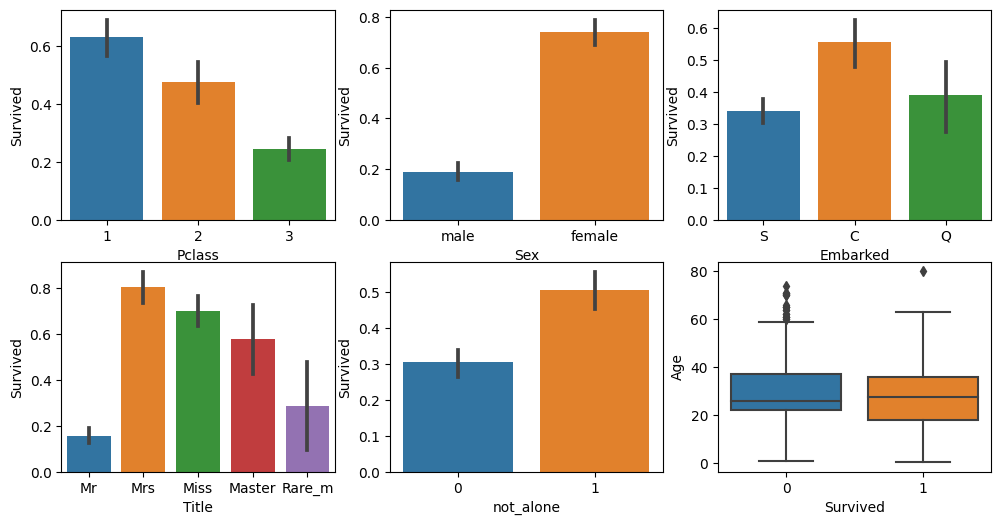

In [76]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))
sns.barplot(data = df, x = 'Pclass', y = 'Survived', ax = ax[0][0]);
sns.barplot(data = df, x = 'Sex', y = 'Survived', ax = ax[0][1]);
sns.barplot(data = df, x = 'Embarked', y = 'Survived', ax = ax[0][2]);
sns.barplot(data = df, x = 'Title', y = 'Survived', ax = ax[1][0]);
sns.barplot(data = df, x = 'not_alone', y = 'Survived', ax = ax[1][1]);
sns.boxplot(data = df, x = 'Survived', y = 'Age', ax = ax[1][2]);

In [77]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


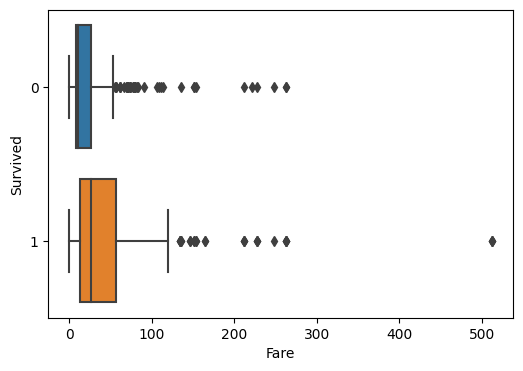

In [78]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.boxplot(data = df, y = 'Survived', x = 'Fare', orient = 'h');


## Preprocessing

In [79]:
df = df.drop('not_alone', axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rare_m
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,18.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [80]:
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Sex', 'Embarked', 'Title']

In [81]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output = False)

df[num_cols] = scaler.fit_transform(df[num_cols])
onehot_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
onehot_df.columns = encoder.get_feature_names_out()
df = pd.concat([df.drop(cat_cols, axis = 1), onehot_df], axis = 1)

In [82]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)


## Modeling

In [83]:
import xgboost
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [84]:
# baseline

xgb = xgboost.XGBClassifier(random_state = 5)
xgb = xgb.fit(
    X_train, y_train,
    eval_set = [(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds = 10,
    verbose = False
)

y_xgb = xgb.predict(X_test)

print(accuracy_score(y_test, y_xgb))

0.8435754189944135


In [85]:
pd.crosstab(y_test, y_xgb)

col_0,0,1
Survived,,
0,99,12
1,16,52


In [86]:
space = {
    'eta': hp.uniform('eta', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 300, 1)
}

In [87]:
def objective(space):
    clf = xgboost.XGBClassifier(
        eta = space['eta'],
        max_depth = int(space['max_depth']),
        subsample = space['subsample'],
        n_estimators = int(space['n_estimators']),
        random_state = 5
    )

    clf.fit(
        X_train, y_train,
        eval_set = [(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds = 10,
        verbose = False
    )

    pred = clf.predict(X_val)
   
    accuracy = accuracy_score(y_val, pred > 0.5) 

    return {'loss': -accuracy, 'status': STATUS_OK}

In [88]:
trials = Trials()
best_params = fmin(
    fn = objective,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = trials
)

100%|██████████| 100/100 [00:08<00:00, 11.61trial/s, best loss: -0.8671328671328671]


In [89]:
best_params

{'eta': 0.20519203327801921,
 'max_depth': 3.0,
 'n_estimators': 140.0,
 'subsample': 0.6829870027757046}

In [90]:
xgb_opt = xgboost.XGBClassifier(
    eta = best_params['eta'],
    max_depth = int(best_params['max_depth']),
    subsample = best_params['subsample'],
    n_estimators = int(best_params['n_estimators']),
    random_state = 5
)

xgb_opt = xgb_opt.fit(
    X_train, y_train,
    eval_set = [(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds = 10,
    verbose = False
)

y_xgb_opt = xgb_opt.predict(X_test)

print(accuracy_score(y_test, y_xgb_opt))

0.8547486033519553


In [91]:
pd.crosstab(y_test, y_xgb_opt)

col_0,0,1
Survived,,
0,105,6
1,20,48


In [92]:
dist = {
    'eta': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.6, 0.8, 1],
    'n_estimators': [100, 200, 250, 300]
}

xgb = xgboost.XGBClassifier(random_state = 5)

xgb_cv = RandomizedSearchCV(xgb, dist, random_state = 5, verbose = 1)

xgb_cv = xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [93]:
xgb_cv.best_params_

{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 10, 'eta': 0.01}

In [94]:
y_xgb_cv = xgb_cv.predict(X_test)

print(accuracy_score(y_test, y_xgb_cv))

0.8491620111731844


In [95]:
pd.crosstab(y_test, y_xgb_cv)

col_0,0,1
Survived,,
0,103,8
1,19,49


## SHAP

In [96]:
import shap

In [97]:
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(X_test)

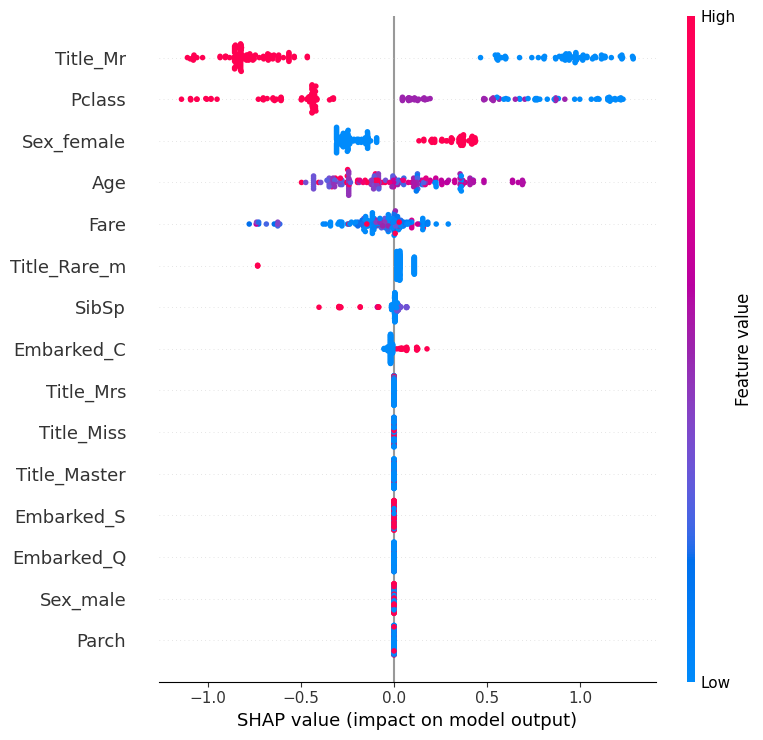

In [98]:
shap.summary_plot(shap_values, X_test)